   AddressOfEntryPoint  MajorLinkerVersion  MajorImageVersion  \
0                10407                   9                  6   
1                 5354                   9                  6   
2                58807                   9                  6   
3                25166                   9                  6   
4                70387                   9                  6   

   MajorOperatingSystemVersion  DllCharacteristics  SizeOfStackReserve  \
0                            6               33088              262144   
1                            6               33088              262144   
2                            6               33088              262144   
3                            6               33088              262144   
4                            6               33088              262144   

   NumberOfSections  ResourceSize  legitimate  
0                 4           952           1  
1                 4           952           1  
2                 4 

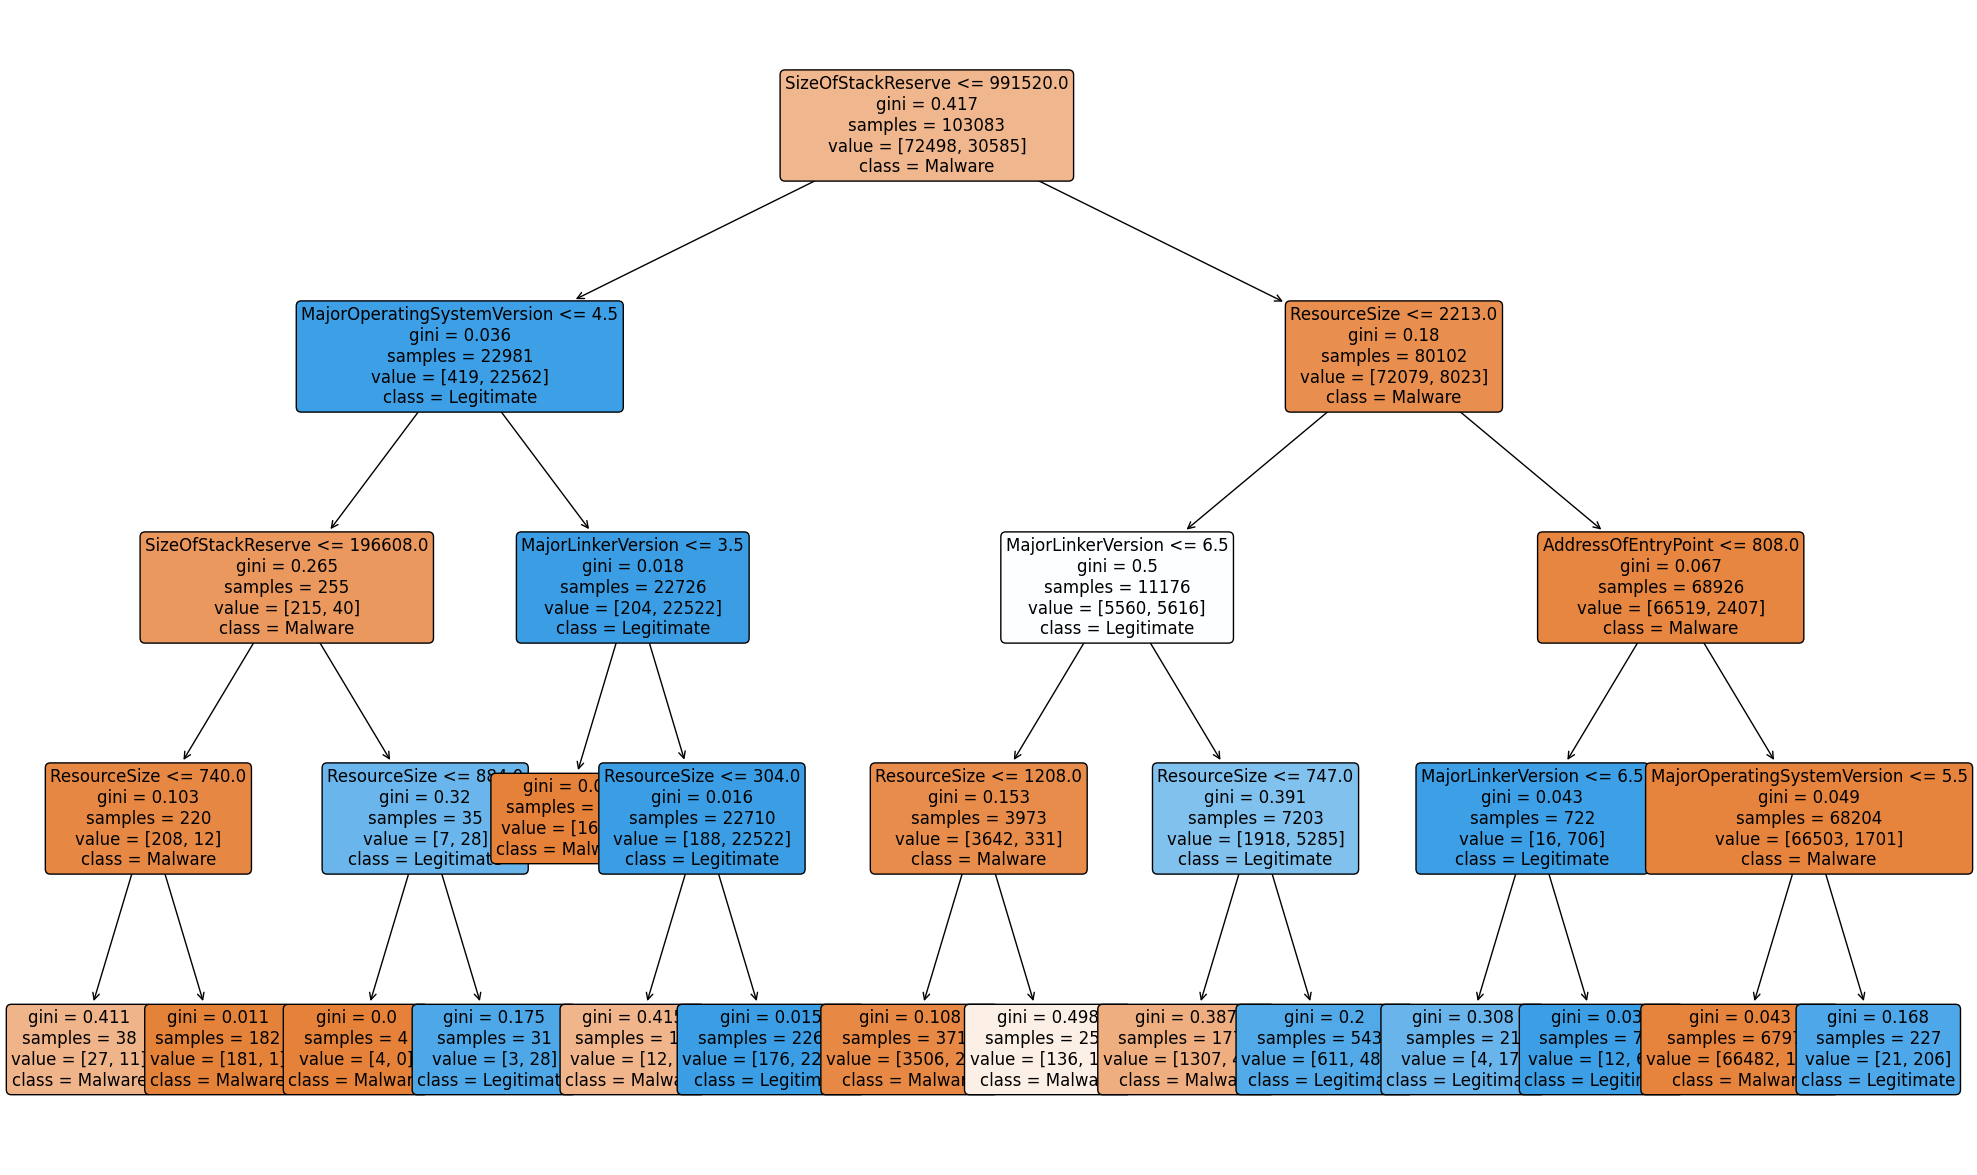

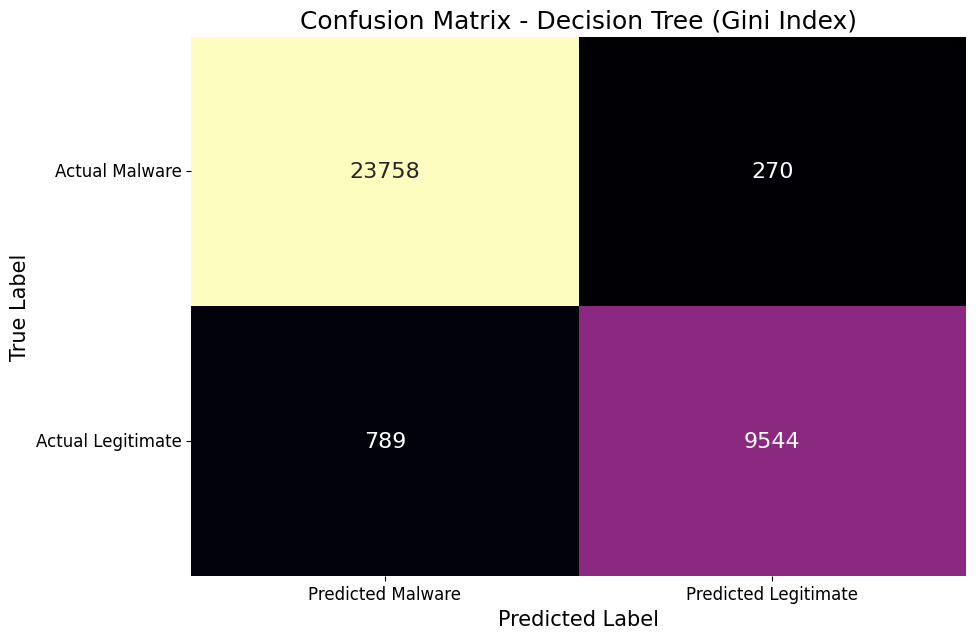

              precision    recall  f1-score   support

     Malware       0.97      0.99      0.98     24028
  Legitimate       0.97      0.92      0.95     10333

    accuracy                           0.97     34361
   macro avg       0.97      0.96      0.96     34361
weighted avg       0.97      0.97      0.97     34361



In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import tree


data = pd.read_csv('dataset/MalwareDataSet.csv')

print(data.head(5))
print(data.shape)
print(data.describe())


print(data.groupby(data['legitimate']).size())


features = data.iloc[:, [0,1,2,3,4,5,6,7]].values  
labels = data.iloc[:, 8].values  


features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.25, random_state=42)


tree_model = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=42)


scores = cross_val_score(tree_model, features_train, labels_train, cv=5)
print(f"Cross-validation scores: {scores}")
print(f"Mean score: {scores.mean()} with standard deviation: {scores.std()}")


tree_model.fit(features_train, labels_train)


labels_pred = tree_model.predict(features_test)


fig = plt.figure(figsize=(25,15))
_ = tree.plot_tree(tree_model,
                   feature_names=data.columns[:8],  
                   class_names=['Malware', 'Legitimate'],  
                   rounded=True, filled=True, fontsize=12)


conf_matrix = confusion_matrix(labels_test, labels_pred)
matrix_df = pd.DataFrame(conf_matrix, index=['Actual Malware', 'Actual Legitimate'], columns=['Predicted Malware', 'Predicted Legitimate'])


plt.figure(figsize=(10,7))
ax = sns.heatmap(matrix_df, annot=True, fmt="g", cmap="magma", cbar=False, annot_kws={"size": 16})
ax.set_title('Confusion Matrix - Decision Tree (Gini Index)', fontsize=18)
ax.set_xlabel('Predicted Label', fontsize=15)
ax.set_ylabel('True Label', fontsize=15)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.show()


print(classification_report(labels_test, labels_pred, target_names=['Malware', 'Legitimate']))


Cross-validation scores: [0.97201339 0.97123733 0.97429306 0.97167249 0.9685196 ]
Mean score: 0.9715471716746744 with standard deviation: 0.0018458154495385327


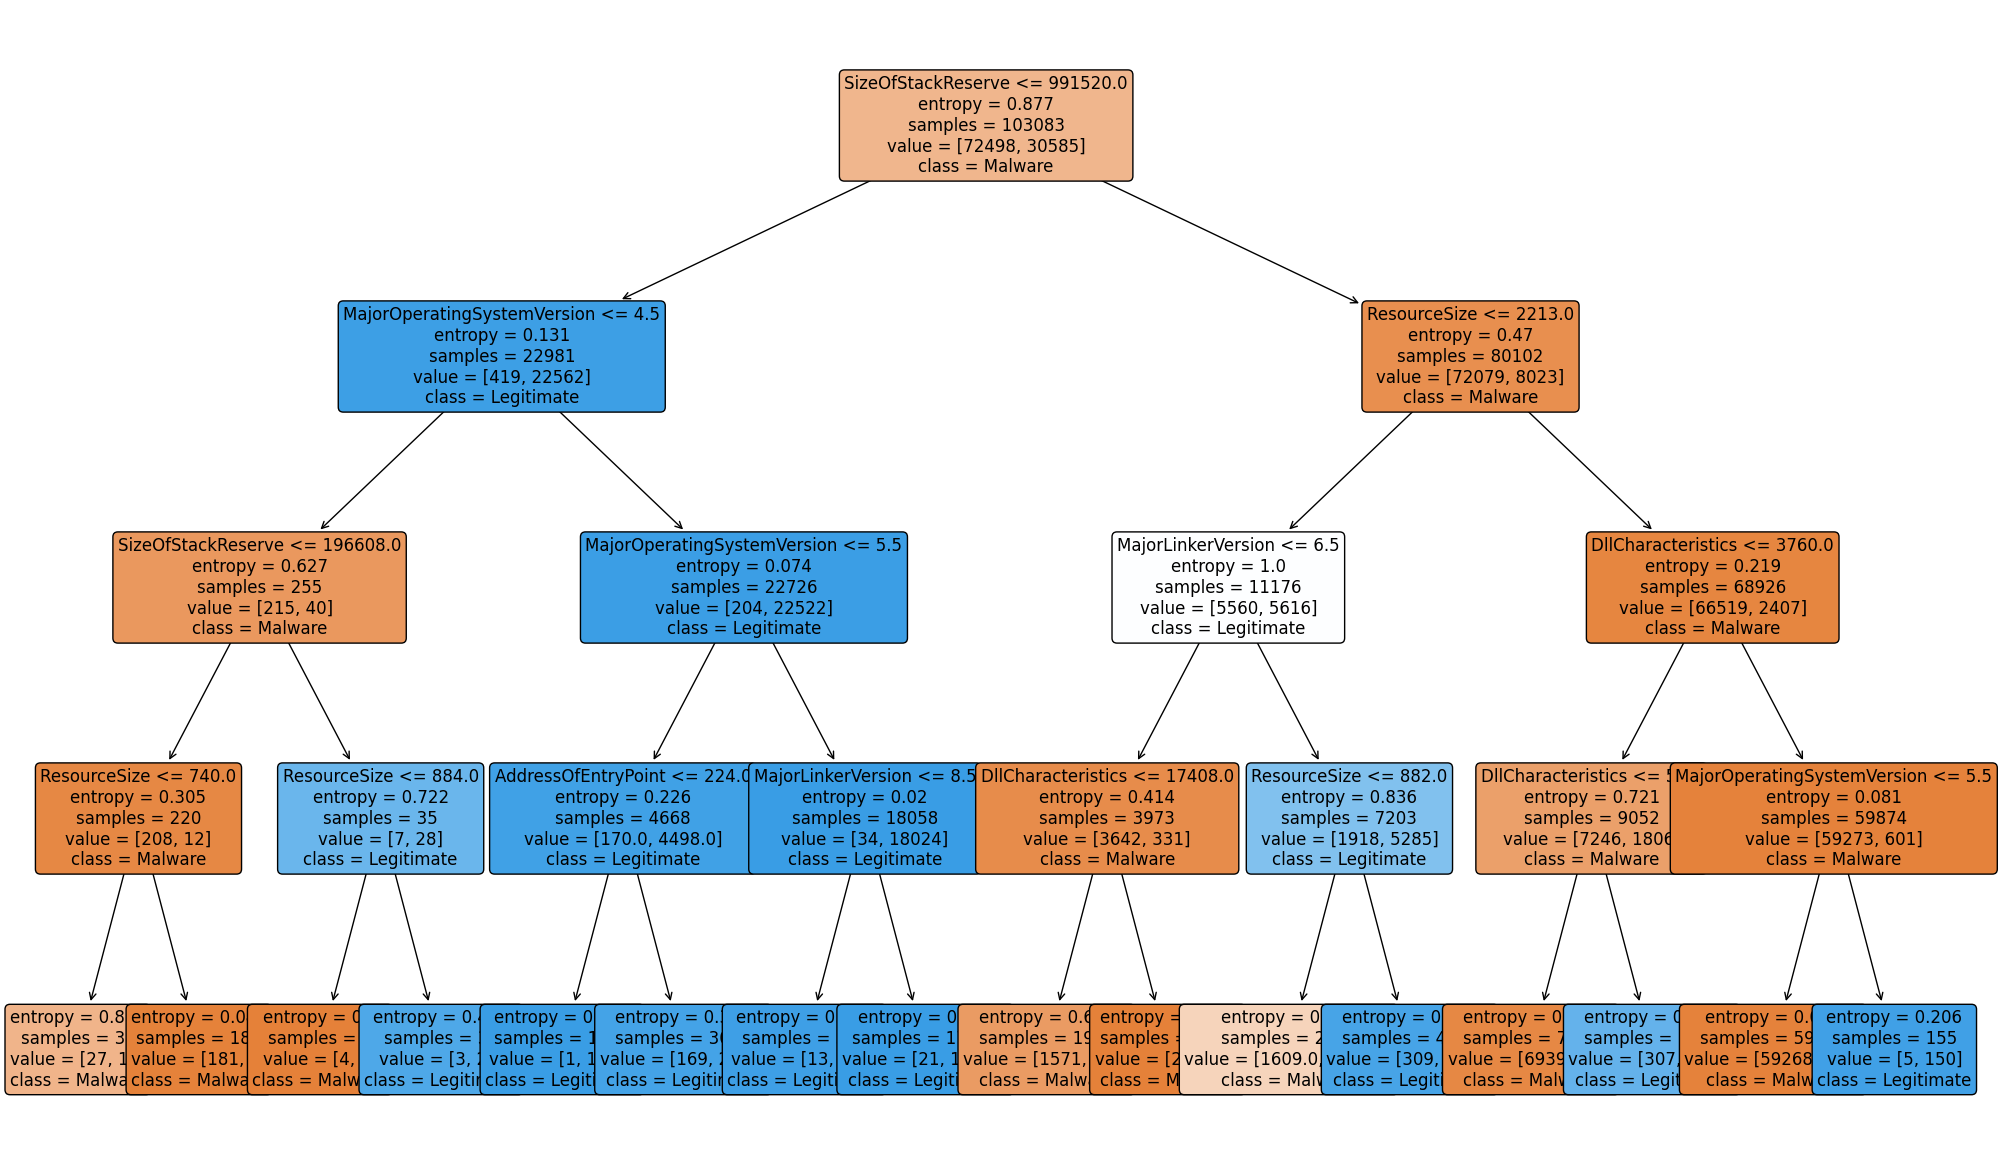

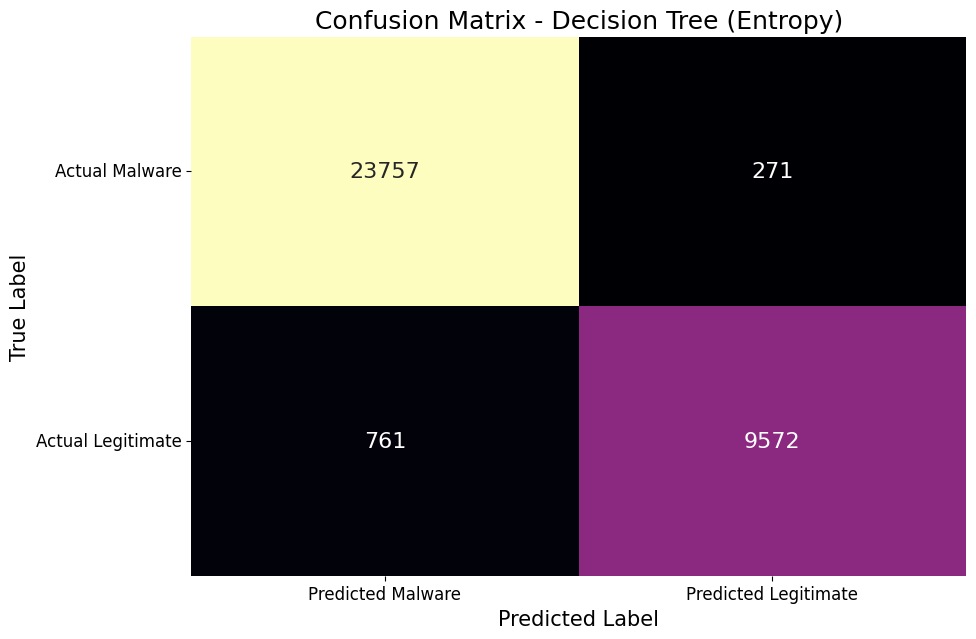

              precision    recall  f1-score   support

     Malware       0.97      0.99      0.98     24028
  Legitimate       0.97      0.93      0.95     10333

    accuracy                           0.97     34361
   macro avg       0.97      0.96      0.96     34361
weighted avg       0.97      0.97      0.97     34361



In [4]:
tree_model = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)


scores = cross_val_score(tree_model, features_train, labels_train, cv=5)
print(f"Cross-validation scores: {scores}")
print(f"Mean score: {scores.mean()} with standard deviation: {scores.std()}")


tree_model.fit(features_train, labels_train)


labels_pred = tree_model.predict(features_test)


fig = plt.figure(figsize=(25,15))
_ = tree.plot_tree(tree_model,
                   feature_names=data.columns[:8],  
                   class_names=['Malware', 'Legitimate'],  
                   rounded=True, filled=True, fontsize=12)


conf_matrix = confusion_matrix(labels_test, labels_pred)
matrix_df = pd.DataFrame(conf_matrix, index=['Actual Malware', 'Actual Legitimate'], columns=['Predicted Malware', 'Predicted Legitimate'])


plt.figure(figsize=(10,7))
ax = sns.heatmap(matrix_df, annot=True, fmt="g", cmap="magma", cbar=False, annot_kws={"size": 16})
ax.set_title('Confusion Matrix - Decision Tree (Entropy)', fontsize=18)
ax.set_xlabel('Predicted Label', fontsize=15)
ax.set_ylabel('True Label', fontsize=15)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.show()


print(classification_report(labels_test, labels_pred, target_names=['Malware', 'Legitimate']))

XG BOOST


(137444, 9)
       AddressOfEntryPoint  MajorLinkerVersion  MajorImageVersion  \
count         1.374440e+05       137444.000000      137444.000000   
mean          1.722186e+05            8.620784          68.731876   
std           3.438014e+06            4.095635        1185.709873   
min           0.000000e+00            0.000000           0.000000   
25%           1.272100e+04            8.000000           0.000000   
50%           5.300800e+04            9.000000           0.000000   
75%           6.157800e+04           10.000000           6.000000   
max           1.074484e+09          255.000000       28619.000000   

       MajorOperatingSystemVersion  DllCharacteristics  SizeOfStackReserve  \
count                137444.000000       137444.000000        1.374440e+05   
mean                      5.098738        22301.043436        9.306841e+05   
std                      99.437584        15444.753219        5.553175e+05   
min                       0.000000            0.000000

c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:49:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:49:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:49:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are no

Cross-validation scores: [0.98855314 0.98903817 0.99015376 0.98840706 0.987922  ]
Mean score: 0.9888148259112848 with standard deviation: 0.0007582223634717863


c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:49:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.99


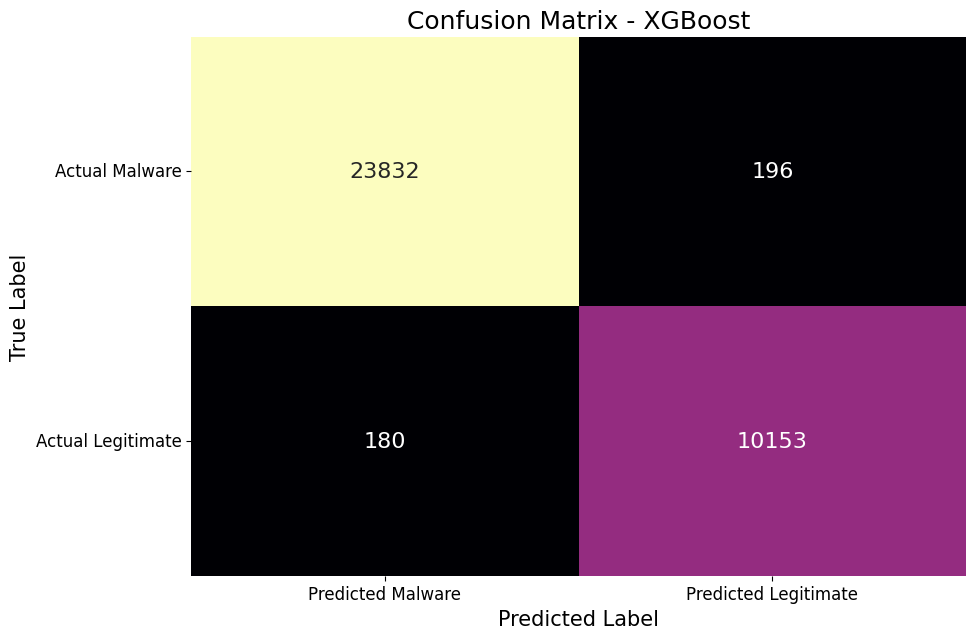

              precision    recall  f1-score   support

     Malware       0.99      0.99      0.99     24028
  Legitimate       0.98      0.98      0.98     10333

    accuracy                           0.99     34361
   macro avg       0.99      0.99      0.99     34361
weighted avg       0.99      0.99      0.99     34361



<Figure size 1200x800 with 0 Axes>

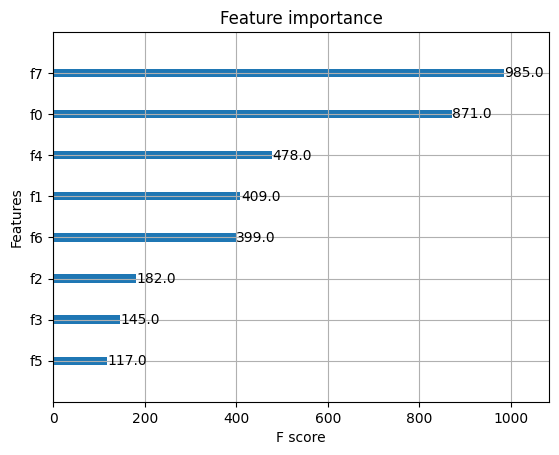

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from xgboost import plot_importance

# Load dataset
data = pd.read_csv('dataset/MalwareDataSet.csv')

# Display basic dataset info
print(data.shape)
print(data.describe())

# Group by 'legitimate' column (Malware or Legitimate)
print(data.groupby(data['legitimate']).size())

# Features and labels
features = data.iloc[:, [0,1,2,3,4,5,6,7]].values  
labels = data.iloc[:, 8].values  

# Split the data into training and testing sets
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.25, random_state=42)

# Initialize XGBoost classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Perform cross-validation
scores = cross_val_score(xgb_model, features_train, labels_train, cv=5)
print(f"Cross-validation scores: {scores}")
print(f"Mean score: {scores.mean()} with standard deviation: {scores.std()}")

# Train the model
xgb_model.fit(features_train, labels_train)

# Make predictions
labels_pred = xgb_model.predict(features_test)

# Calculate accuracy
accuracy = accuracy_score(labels_test, labels_pred)
print(f"Accuracy: {accuracy:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(labels_test, labels_pred)
matrix_df = pd.DataFrame(conf_matrix, index=['Actual Malware', 'Actual Legitimate'], columns=['Predicted Malware', 'Predicted Legitimate'])

# Plot Confusion Matrix
plt.figure(figsize=(10,7))
ax = sns.heatmap(matrix_df, annot=True, fmt="g", cmap="magma", cbar=False, annot_kws={"size": 16})
ax.set_title('Confusion Matrix - XGBoost', fontsize=18)
ax.set_xlabel('Predicted Label', fontsize=15)
ax.set_ylabel('True Label', fontsize=15)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.show()

# Print classification report
print(classification_report(labels_test, labels_pred, target_names=['Malware', 'Legitimate']))

# Plot feature importance
plt.figure(figsize=(12,8))
plot_importance(xgb_model, importance_type='weight')
plt.show()


Random Forest

(137444, 9)
       AddressOfEntryPoint  MajorLinkerVersion  MajorImageVersion  \
count         1.374440e+05       137444.000000      137444.000000   
mean          1.722186e+05            8.620784          68.731876   
std           3.438014e+06            4.095635        1185.709873   
min           0.000000e+00            0.000000           0.000000   
25%           1.272100e+04            8.000000           0.000000   
50%           5.300800e+04            9.000000           0.000000   
75%           6.157800e+04           10.000000           6.000000   
max           1.074484e+09          255.000000       28619.000000   

       MajorOperatingSystemVersion  DllCharacteristics  SizeOfStackReserve  \
count                137444.000000       137444.000000        1.374440e+05   
mean                      5.098738        22301.043436        9.306841e+05   
std                      99.437584        15444.753219        5.553175e+05   
min                       0.000000            0.000000

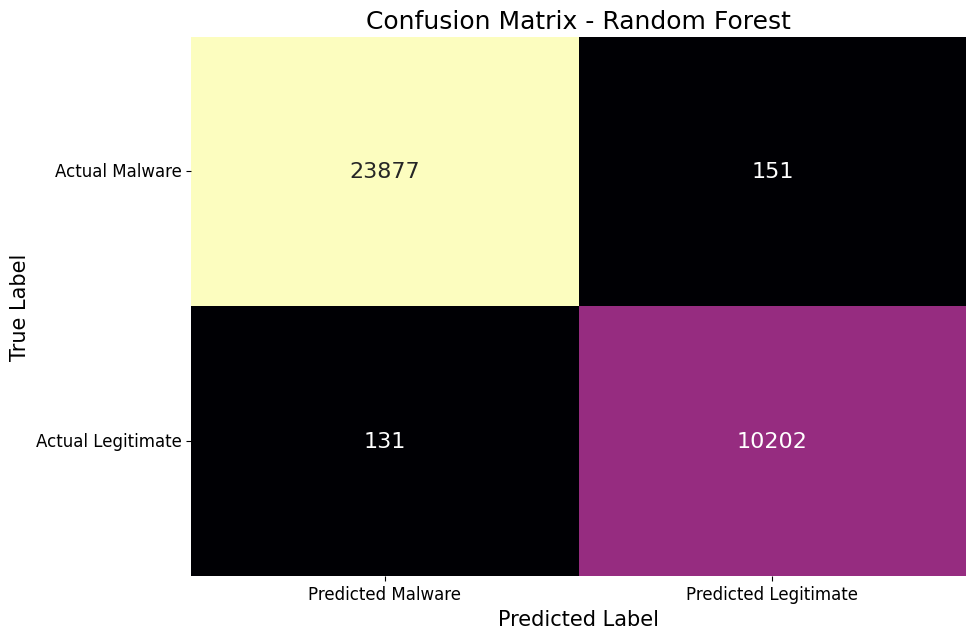

              precision    recall  f1-score   support

     Malware       0.99      0.99      0.99     24028
  Legitimate       0.99      0.99      0.99     10333

    accuracy                           0.99     34361
   macro avg       0.99      0.99      0.99     34361
weighted avg       0.99      0.99      0.99     34361



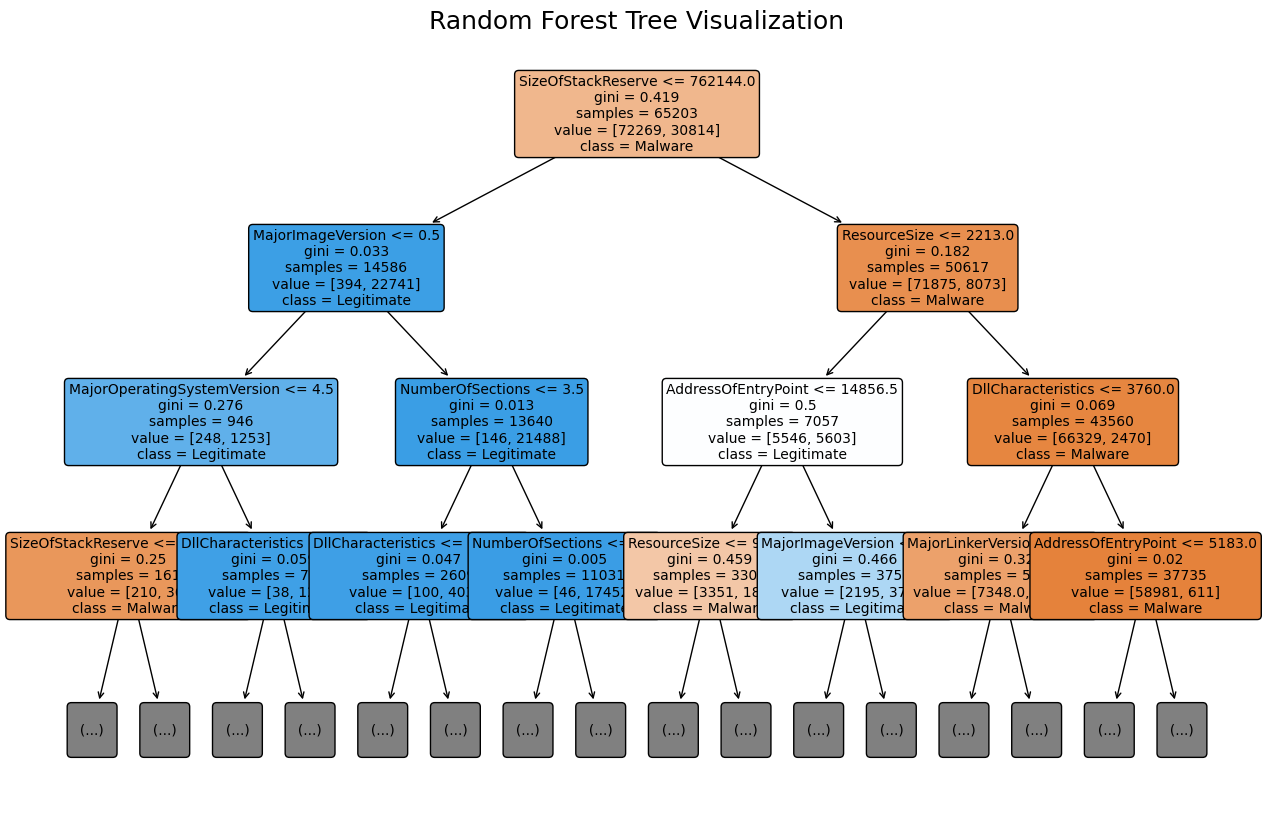

In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.tree import plot_tree

# Load dataset
data = pd.read_csv('dataset/MalwareDataSet.csv')

# Display basic dataset info
print(data.shape)
print(data.describe())

# Group by 'legitimate' column (Malware or Legitimate)
print(data.groupby(data['legitimate']).size())

# Features and labels
features = data.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7]].values  
labels = data.iloc[:, 8].values  

# Split the data into training and testing sets
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.25, random_state=42)

# Initialize Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform cross-validation
scores = cross_val_score(rf_model, features_train, labels_train, cv=5)
print(f"Cross-validation scores: {scores}")
print(f"Mean score: {scores.mean()} with standard deviation: {scores.std()}")

# Train the model
rf_model.fit(features_train, labels_train)

# Make predictions
labels_pred = rf_model.predict(features_test)

# Calculate accuracy
accuracy = accuracy_score(labels_test, labels_pred)
print(f"Accuracy: {accuracy:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(labels_test, labels_pred)
matrix_df = pd.DataFrame(conf_matrix, index=['Actual Malware', 'Actual Legitimate'], columns=['Predicted Malware', 'Predicted Legitimate'])

# Plot Confusion Matrix
plt.figure(figsize=(10, 7))
ax = sns.heatmap(matrix_df, annot=True, fmt="g", cmap="magma", cbar=False, annot_kws={"size": 16})
ax.set_title('Confusion Matrix - Random Forest', fontsize=18)
ax.set_xlabel('Predicted Label', fontsize=15)
ax.set_ylabel('True Label', fontsize=15)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.show()

# Print classification report
print(classification_report(labels_test, labels_pred, target_names=['Malware', 'Legitimate']))

# Visualize one of the trees from the Random Forest
plt.figure(figsize=(15, 10))  # Adjusted size for better visibility
plot_tree(rf_model.estimators_[0],  # Visualize the first tree in the forest
          feature_names=data.columns[:8],
          class_names=['Malware', 'Legitimate'],
          filled=True, rounded=True, fontsize=10,
          max_depth=3)  # Removed impurity and the last level custom text for clarity

plt.title("Random Forest Tree Visualization", fontsize=18)
plt.show()
